# <center>**Group 39 STAT 301 Final Report**

#### <center>Group Members: Alice Le, Sohbat Sandhu, Tanvi Singh, Zimo Zhang

## ***Predictive Analysis on Prices of Rental Apartments in USA using Major Rental Price Influencers***

## **Introduction**

### Data Information
We are using a [Dataset of classified for apartments for rent in United States of America](https://doi.org/10.24432/C5X623). The dataset contains 10,000 instances of classified apartments with 22 features (listed in the table below). The data has been originally cleaned in such a way that **column** *price* and *square_feet* variables are never empty but the dataset is saved as it was created.

The data has been collected from 12 unique online sources for rental listings and has been collected from September 2019 to December 2019.

| **Variables** | **Data type** | **Description** |
| :-: | :-: | :- |
| **id** | *double* | Every Apartment on the classified is given a Unique Identifier |
| **category** | *character* | Category of the apartment classified informs us about the type of rental property|
| **title** | *character* | Title of the rental property listed in the Classified|
| **body** | *character* | Description of the rental apartment listed in the Classified |
| **amenities** | *character* | Amenities included with the rental apartment |
| **bathrooms** | *character* | Number of bathrooms in the rental apartment |
| **bedrooms** | *character* | Number of bedrooms in the rental apartment|
| **currency** | *character* | Currency used for the price listing of the rental apartment in the Classified|
| **fee** | *character* | Additional Apartment Fee for the renting the rental apartment in the Classified|
| **has_photo** | *character* | Does the rental apartment listed in the Classified comes with a photo?|
| **pets_allowed** | *character* | Types of pets allowed in the rental apartment|
| **price** | *double* | Rental Price of Apartment |
| **price_display** | *character* | Price converted into display for reader in the classified|
| **price_type** | *character* | Price in USD of the rental apartment| 
| **square_feet** | *double* | Size of rental Apartment in Square Feet as listed in the classified|
| **address** | *character* | Street Address of the rental apartment|
| **cityname** | *character* | City Location of the rental apartment|
| **state** | *character* | State/District Location of the rental apartment |
| **latitude** | *character* | Latitude Coordinates of the rental apartment |
| **longitude** | *character* | Longitude Coordinates of the rental apartment |
| **source** | *character* | Source from which the classified was taken from or the source at which the apartment was listed for rental |
| **time** | *double* | Time at which the the apartment was listed for rental (in Epoch Unix Timestamp) |

##### *Table 1. Information of features in the Classified Dataset*

Through analysis of our dataset, we are looking to develop a predictive model that predicts rental prices in the USA. 

According to [Nishani (2016)](https://www.researchgate.net/publication/303507168_Determinants_of_rental_value_for_residential_properties_A_land_owner%27s_perspective_for_boarding_homes), the attributes that affect rental prices can be categorised into three major aspects, namely: physical attributes, locational attributes, and the amenities provided. 

Based on our chosen dataset, we can split up relevant explanatory variables for our chosen response variable `price` such:
* Physical attributes — `bathrooms` ,` bedrooms` , `square_feet`
* Locational attributes — `state`
* Amenities provided — `pets_allowed`, `amenities`

Other variables are omitted due to their redundancy, due to the fact that they do not fall under the three identified categories, or they cannot be quantified in a way that can be used in this research.

The representative dataset includes information about features owners and potential tenants have at their disposal when judging the rental price of apartments from the various states and regions in the USA.

We have chosen these variables due to their importance in choosing a place to rent, along with the fact that they have varying levels that can also impact rental prices. The variation will be a good way to produce a predictor tool that accounts for many different types of observations. 

Creating a predictor tool like this is crucial, especially in the midst of a housing crisis. There are a range of difficulties when trying to find a house to rent, when there are many criteria to adhere to. 

For example, pet-owners would have a hard time finding a more affordable place to live, considering that it is considered a “luxury”, accompanied with a pet fee or a pet deposit. On the other hand, the location of the apartment, based on the US state, is a huge factor in indicating the rental price. Apartments located in metropolitan areas tend to be more expensive than those in areas with more vacancy [Collinson (2009)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1583176).

We aim to create a predictor tool that has the potential to compensate for and/or incorporate any new explanatory variables that may be added in the future. On the same note, we will be comprehensive enough to create a tool that can be used elsewhere, in order to predict rental prices elsewhere. 

## **Methods and Results**

### Data Preparation (Import, Clean and Wrangle Data)

In [1]:
# Load useful libraries
library(tidyverse)
library(tidymodels)
library(GGally)
library(infer)
library(AER)
library(leaps)
library(dplyr)
library(reshape2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Assign dataset url which was uploaded to github from the original website for easier access
classified_url <- "https://raw.githubusercontent.com/vyle2003/STAT_301_Project/main/apartments_for_rent_classified_10K.csv"

# Read csv file and assign
apartments <- read_csv2(classified_url)
head(apartments, 1)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 10000 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (18): category, title, body, amenities, bathrooms, bedrooms, currency, f...
dbl  (4): id, price, square_feet, time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id         category              
1 5668626895 housing/rent/apartment
  title                                                              
1 Studio apartment 2nd St NE, Uhland Terrace NE, Washington, DC 20002
  body                                                                                                                                                                                   
1 This unit is located at second St NE, Uhland Terrace NE, Washington, DC 20002, Washington, 20002, DCMonthly rental rates range from $790 - $1090We have studio units available for rent
  amenities bathrooms bedrooms currency fee has_photo ⋯ price_display
1 null      null      0        USD      No  Thumbnail ⋯ $790         
  price_type square_feet address cityname   state latitude longitude source   
1 Monthly    101         null    Washington DC    38.9057  -76.9861  RentLingo
  time      
1 1577359415

In [3]:
# Excluding variables that are unnecessary for analysis
    # excluding "id", "title", "body", "source" : variables not relevant to question of interest
    # excluding "category", "currency", "fee" : show negligible variation in values
    # excluding "has_photo": price calculated by the owner, consumers opinion about the photo leads to no variation in price
    # excluding "address," "cityname", "latitude", "longitude" : using location in a broader scope (using "state" variable)
# assigning dataframe to a new variable
apartmentsTidy <- apartments %>%
    select(-c("id" : "body", "currency", "fee", "has_photo", "address", "cityname", "latitude", "longitude", "source", "time"))
head(apartmentsTidy)

amenities                                   bathrooms bedrooms pets_allowed
1 null                                        null      0        None        
2 null                                        null      1        None        
3 null                                        1         0        None        
4 null                                        1         0        None        
5 null                                        null      0        None        
6 Dishwasher,Elevator,Patio/Deck,Pool,Storage 1         0        null        
  price price_display price_type square_feet state
1  790  $790          Monthly    101         DC   
2  425  $425          Monthly    106         IN   
3 1390  $1,390        Monthly    107         VA   
4  925  $925          Monthly    116         WA   
5  880  $880          Monthly    125         VA   
6 2475  $2,475        Monthly    130         NY

##### *Table 2. Feature values for the relevant variables of Classified Dataset*

In [4]:
# Tidy data for easier analysis

# Assigning appropriate values for the number of bathrooms (1) and bedrooms (0) for studio apartments 
# (represented as "null" values in dataset as studio apartments)
apartmentsTidy$bathrooms <- ifelse(apartmentsTidy$bathrooms == "null", "1", apartmentsTidy$bathrooms)
apartmentsTidy$bedrooms <- ifelse(apartmentsTidy$bedrooms == "null", "0", apartmentsTidy$bedrooms)

# Transforming price of an apartment where the rent in not "Monthly" (price is calculated "Weekly")
apartmentsTidy$price <- ifelse((apartmentsTidy$price_type != "Monthly"), 
                               4*apartmentsTidy$price, apartmentsTidy$price) # as there are 4 weeks in a month

# Calculate the number of amenities and place the number in a separate column named 'no_of_amenities'
apartmentsTidy <- apartmentsTidy %>%
    mutate(no_of_amenities = ifelse(amenities == "null", 
                                    0, str_count(amenities, ",") + 1)) %>%
    select(-amenities)

# Convert relevant variables with chr data types to dbl
apartmentsTidy <- apartmentsTidy %>%
    mutate(bathrooms = as.numeric(bathrooms)) %>%
    mutate(bedrooms = as.numeric(bedrooms)) %>%
    select(-c("price_display", "price_type"))

# Assign appropriate values for "null" in pets_allowed column 
# (we are assuming that as there is no information about the pets policy there is no restriction on pets)
apartmentsTidy$pets_allowed <- ifelse(apartmentsTidy$pets_allowed == "null", "Yes", apartmentsTidy$pets_allowed)
apartmentsTidy$pets_allowed <- ifelse(apartmentsTidy$pets_allowed == "Cats,Dogs", "Cats&Dogs", apartmentsTidy$pets_allowed)
apartmentsTidy$pets_allowed <- ifelse(apartmentsTidy$pets_allowed == "Cats", "OnlyCats", apartmentsTidy$pets_allowed)
apartmentsTidy$pets_allowed <- ifelse(apartmentsTidy$pets_allowed == "Dogs", "OnlyDogs", apartmentsTidy$pets_allowed)

# Remove outliers for better prediction performance
lower <- quantile(apartmentsTidy$price, 0.5) - 1.5*IQR(apartmentsTidy$price)
upper <- quantile(apartmentsTidy$price, 0.5) + 1.5*IQR(apartmentsTidy$price)

apartmentsTidy <- apartmentsTidy %>%
    filter((price <= upper) & (price >= lower))
head(apartmentsTidy)

bathrooms bedrooms pets_allowed price square_feet state no_of_amenities
1 1         0        None          790  101         DC    0              
2 1         1        None          425  106         IN    0              
3 1         0        None         1390  107         VA    0              
4 1         0        None          925  116         WA    0              
5 1         0        None          880  125         VA    0              
6 1         0        None         1800  132         CA    0

##### *Table 3. Tidied Table*

### Exploratory Data Analysis and Visualization

Warning message:
“Removed 198 rows containing missing values (`geom_point()`).”


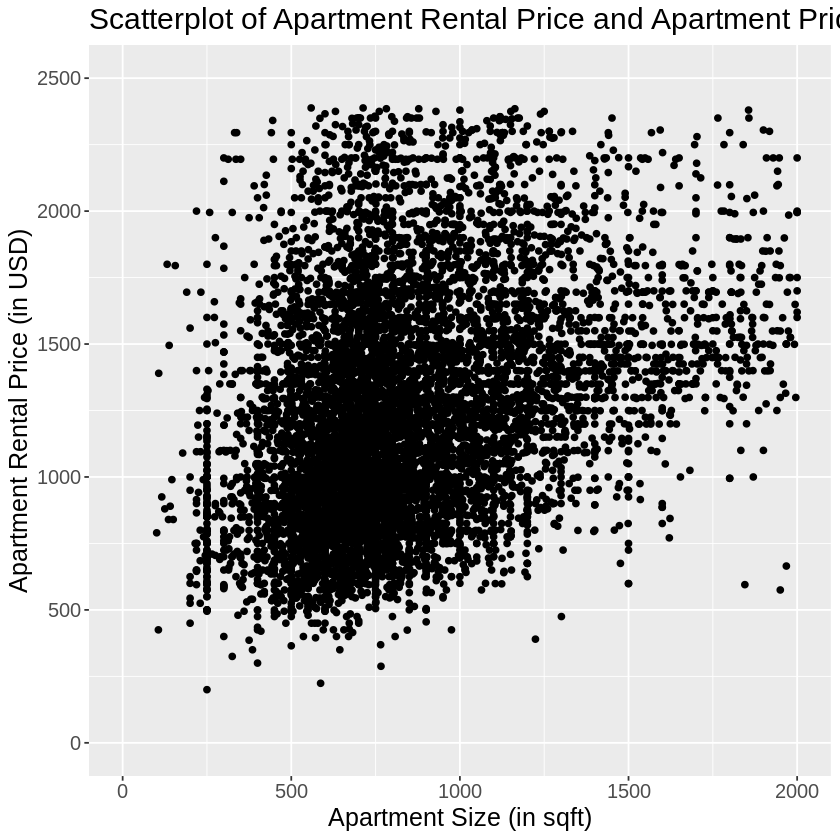

In [5]:
# Plot scatterplot: price vs size of an apartment
apartmentsTidy %>% ggplot(aes(x = square_feet, y = price)) +
    geom_point() +
    labs(x = "Apartment Size (in sqft)", y = "Apartment Rental Price (in USD)") +
    ggtitle("Scatterplot of Apartment Rental Price and Apartment Price") +
    theme(text = element_text(size = 15)) +
    scale_y_continuous(limits = c(0, 2500)) + 
    scale_x_continuous(limits = c(0, 2000))

##### *Figure 1. Scatterplot between Apartment Size and Apartment Price* 

> **Observations:** From Figure.1 we observe a possible positive correlation between the Apartment Size and Apartment Price indicating that `square_feet` is a potential input variable for Predictive Model

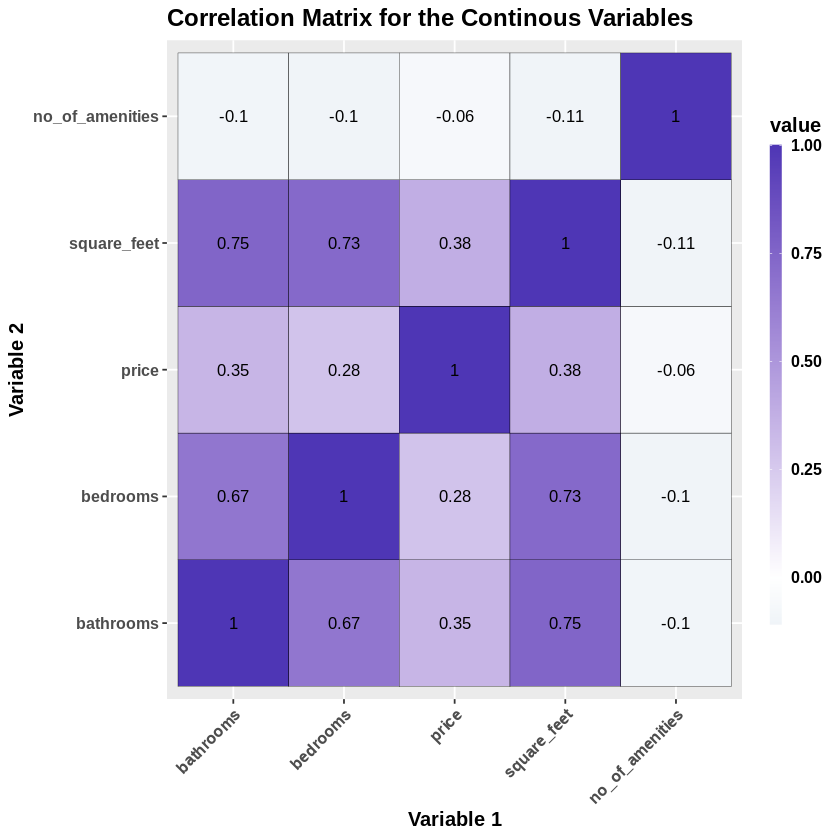

In [6]:
# Explore a potential problem of multicollinearity using pair plots and finding correlation between variables
cor_matrix <- cor(subset(apartmentsTidy, select = -c(pets_allowed, state)))
melted <- melt(cor_matrix)

corr_plot <- ggplot(melted) +
    geom_tile(aes(Var1, Var2, fill=value), colour = "black") + 
    geom_text(aes(Var1, Var2, label = round(value,2)), color = "black", size = 3.5) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), text = element_text(size = 12, face = "bold")) +
    scale_fill_gradient2(low = "#6D9EC1", high = "#4e36b5")+
    guides(fill = guide_colourbar(barwidth = 0.5, barheight = 20)) +
    labs(x = "Variable 1", y = "Variable 2") +
    ggtitle("Correlation Matrix for the Continous Variables")
corr_plot

##### *Figure 2. Heatmap for calculating correlation* 

> **Observations:** From Figure.2 we observe multicollinearity between possible input variables. There is high correlation between `bathrooms` and `square_feet`,  `bathrooms` and `bedrooms`, and `bedrooms` and `square_feet`. The figure also shows poor correlation  between  predictor variable `price` and possible input variable `no_of_amenities`, indicating `no_of_amenities` a poor choice as input variable.

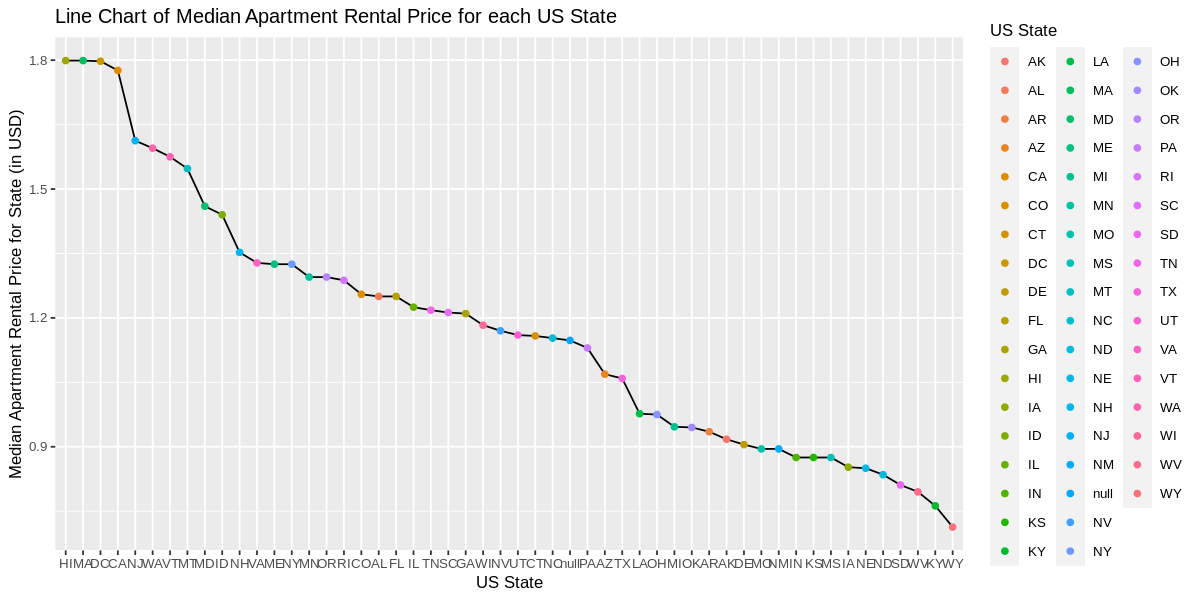

In [7]:
options(repr.plot.width = 10, repr.plot.height = 5)

# Calculate the median price for each state
medians <- aggregate(price ~ state, data = apartmentsTidy, FUN = median)

# Sort the data frame by median values in increasing order
medians <- medians[order(-medians$price), ]

# Plot the median Apartment Price (scaled by 0.0001) according to each state in Descending order
apartmentsTidy %>% select(c("state", "price", "square_feet")) %>% 
    group_by(state) %>% summarize(price = 0.001*median(price)) %>%
    ggplot() +
    geom_line(aes(x = reorder(state, -price), y = price, group = 1)) +
    geom_point(aes(x = reorder(state, -price), y = price, color = state)) +
    labs(x = "US State", y = "Median Apartment Rental Price for State (in USD)", color = "US State") +
    ggtitle("Line Chart of Median Apartment Rental Price for each US State") +
    theme(text = element_text(size = 10))

##### *Figure 3. Line Chart of Median Apartment Rental Price for each US State* 

> **Observations:** From Figure.3 we observe that Apartment Rental Price varies for each state indicating `state` as a potential input variable for our predictive model.

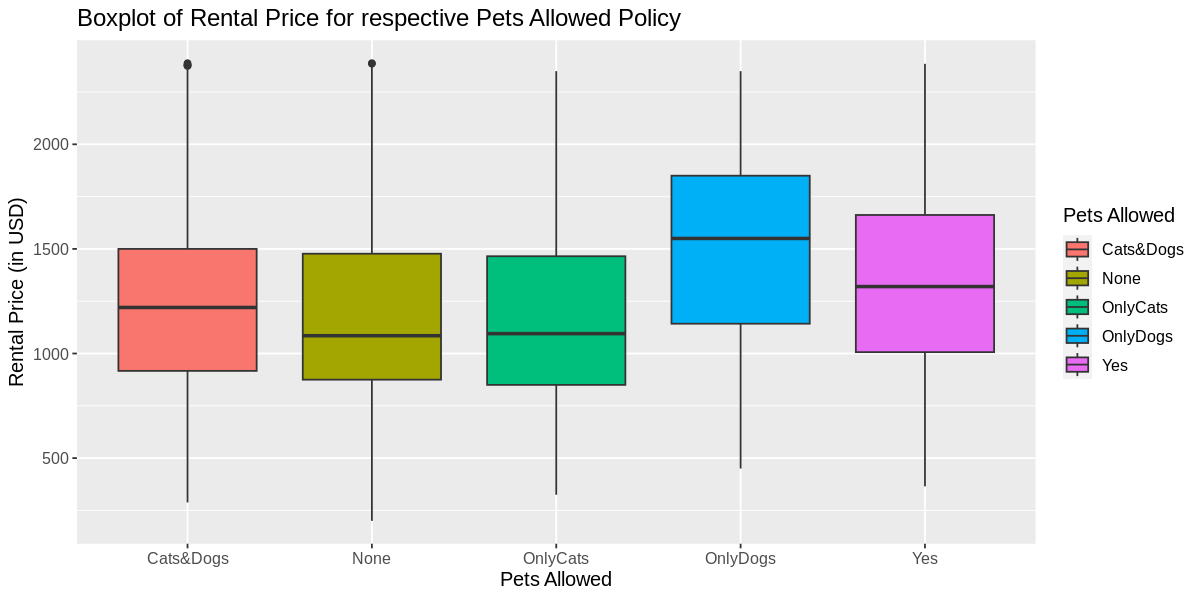

In [8]:
# Boxplot to explore the relationship of the categories for pets_allowed and price 
apartmentsTidy %>%
    ggplot(aes(x = pets_allowed, y = price, fill = pets_allowed)) +
    geom_boxplot() + 
    labs(x = "Pets Allowed", y = "Rental Price (in USD)", fill = "Pets Allowed") +
    ggtitle("Boxplot of Rental Price for respective Pets Allowed Policy") +
    theme(text = element_text(size = 12))

##### *Figure 4. Boxplot of Apartment Rental Price for the respective Pet Policy* 

> **Observations:** From Figure.4 we observe that Apartment Rental Price varies for each pet policy indicating `pets_allowed` as a potential input variable for our predictive model. A huge visible difference in the median apartment price can be seen for the "Only Dogs" and "Yes" category in comparison to other policies

### Methods: Plans

As we are making a predictive model for out-of-sample predictions, we first need to split the data into two datasets, training and testing dataset. The training dataset will be used to train the regression model. To identify the most important variables or predictors that significantly contribute to a model's predictive power, we would use **Forward Stepwise Selection** method to evaluate the linear model metrics such as Mallow's $C_p$, AIC and BIC are computed with the training dataset and select the most appropriate model that minimizes the approximate **Root Mean Squared Error** from the testing dataset.

But before that we have to resolve the problems we face due to the huge number of categories in the `state` variable. To resolve this we have to compress the `state` input variable into a categorical variable with three levels. The three levels after transformation will indicate whether the apartment lies in the state part of the West Coast, East Coast or Central Midwest Region.
Similarly, the `pets_allowed` variable should also be transformed into columns for easier use of the stepwise selection algorithm.

In [9]:
# Compress state variable into regions: West Coast, East Coast and Central Midwest
west_coast <- c("WA", "OR", "CA", "AK", "HI")
east_coast <- c("ME", "NH", "VT", "MA", "RI", "CT", "NY", "NJ", "PA", "DE", "MD", "VA", "WV", "NC", "SC", "GA", "FL")
central_midwest <- c("OH", "IN", "MI", "IL", "WI", "MN", "IA", "MO", "KS", "NE", "SD", "ND", "KY", "TN", "AL", "MS", 
                     "AR", "LA", "TX", "OK", "NM", "AZ", "MT", "ID", "WY", "CO", "UT", "NV")

# Remove "null" state categories
apartmentsTidy <- apartmentsTidy %>%
    filter(state != "null")

# function to assign region to state
assign_region <- function(state) {
    if (state %in% west_coast) {
        return("WestCoast")
    } else if (state %in% east_coast) {
        return("EastCoast") 
    } else {
        return("CentralMidwest")
        }}

# Create "region" and remove "state" variable from dataset
apartmentsTidy <- apartmentsTidy %>%
    mutate(region = sapply(state, assign_region)) %>%
    select(-state)

In [10]:
head(apartmentsTidy)

bathrooms bedrooms pets_allowed price square_feet no_of_amenities
1 1         0        None          790  101         0              
2 1         1        None          425  106         0              
3 1         0        None         1390  107         0              
4 1         0        None          925  116         0              
5 1         0        None          880  125         0              
6 1         0        None         1800  132         0              
  region        
1 CentralMidwest
2 CentralMidwest
3 EastCoast     
4 WestCoast     
5 EastCoast     
6 WestCoast

##### *Table 4. Transformed Data*

Stepwise selection assumes the basic linear model assumptions and this might not always give the most optimal subsets. For example, the EDA shows that there are violations in the assumptions as there is a multicollinearity issue due to a high correlation in `bedrooms`, `bathrooms`, and `square_feet` variables.

Violations in the basic linear model assumption should be appropriately addressed. The multicollinearity violation can be resolved by quantifying multicollinearity using **Variance Inflation Factor** and dropping the input variables with  VIF greater than 5.

In [11]:
# Resolve multicollinearity using vif function and remove the input variable with vif > 5
input <- apartmentsTidy %>%
    select(-c("region", "pets_allowed"))
MLR_apartments <- lm(price ~ ., data = input)
vif_MLR_apartments <- vif(MLR_apartments)

round(vif_MLR_apartments, 3)

bathrooms        bedrooms     square_feet no_of_amenities 
          2.459           2.305           2.939           1.013

As the VIF values are all less than 5, multicollinearity will not be an issue.

In [12]:
# Set seed to generate a reproducible random sample
set.seed(634)

# Split data into training and testing data
apartmentsTidy$ID <- rownames(apartmentsTidy)
training <- apartmentsTidy %>%
    group_by(region, pets_allowed) %>%
    sample_frac(0.75)
testing <- anti_join(apartmentsTidy,
  training,
  by = join_by(ID)
)

# Remove "ID"
training <- training %>% select(-c("ID"))
testing <- testing %>% select(-c("ID"))

In [13]:
# Apply forward stepwise selection agorithm for prediction model selection and maximum subset size can be 11
forward_sel <- regsubsets(
  x = price ~ ., nvmax = 11,
  data = training,
  method = "forward"
)

# Summarise results of algorithm
forward_sel_summary <- summary(forward_sel)

forward_sel_summary <- tibble(
   n_input_variables = 1:10,
   RSS = forward_sel_summary$rss,
   BIC = forward_sel_summary$bic,
   Cp = forward_sel_summary$cp
)

In [14]:
# Forward Selection Summary
forward_sel_summary

n_input_variables RSS        BIC       Cp         
1   1                1067877936 -1002.368 1747.798962
2   2                 905296331 -2097.203  466.993254
3   3                 855670006 -2465.111   77.430301
4   4                 848174835 -2515.092   20.291702
5   5                 846197617 -2521.879    6.691003
6   6                 845772858 -2516.427    5.339553
7   7                 845603911 -2508.955    6.006525
8   8                 845519534 -2500.815    7.340771
9   9                 845492720 -2492.219    9.129202
10 10                 845476345 -2483.541   11.000000

##### *Table 5. Forward Stepwise Selection Algorithm Summary* 

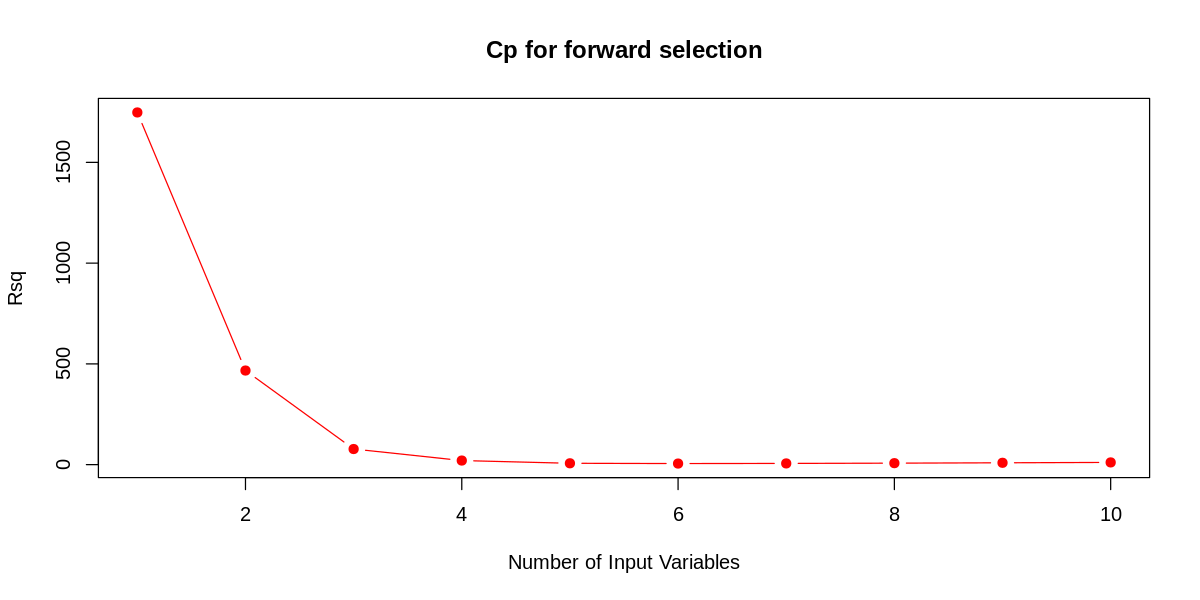

In [15]:
# Plot Mallory's Cp for number of input variables
plot(summary(forward_sel)$cp,
  main = "Cp for forward selection",
  xlab = "Number of Input Variables", ylab = "Rsq", type = "b", pch = 19,
  col = "red"
)

##### *Figure 5. Line Plot Mallory's $C_p$ vs the Number of Input variables* 

In [16]:
summary(forward_sel)

Subset selection object
Call: regsubsets.formula(x = price ~ ., nvmax = 11, data = training, 
    method = "forward")
10 Variables  (and intercept)
                     Forced in Forced out
bathrooms                FALSE      FALSE
bedrooms                 FALSE      FALSE
pets_allowedNone         FALSE      FALSE
pets_allowedOnlyCats     FALSE      FALSE
pets_allowedOnlyDogs     FALSE      FALSE
pets_allowedYes          FALSE      FALSE
square_feet              FALSE      FALSE
no_of_amenities          FALSE      FALSE
regionEastCoast          FALSE      FALSE
regionWestCoast          FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          bathrooms bedrooms pets_allowedNone pets_allowedOnlyCats
1  ( 1 )  " "       " "      " "              " "                 
2  ( 1 )  " "       " "      " "              " "                 
3  ( 1 )  " "       " "      " "              " "                 
4  ( 1 )  "*"       " "      " "              " "            

> Choosing the number of predictors associated with the minimum Mallory's $C_p$ aims to strike a balance between model simplicity and adequate model performance.

In [17]:
# Choose variables for best performance by choosing the variables that minimizes Cp
cp_min = which.min(forward_sel_summary$Cp) 
selected_var <- names(coef(forward_sel, cp_min))[-1]
selected_var

[1] "bathrooms"            "pets_allowedOnlyDogs" "pets_allowedYes"     
[4] "square_feet"          "regionEastCoast"      "regionWestCoast"

In [18]:
# create subset of the training data from the selected variables
encoded_data <- model.matrix(~ . - 1 + as.factor(pets_allowed) + as.factor(region), data = training)
df_train <- as.data.frame(encoded_data)
training_subset <- df_train %>% select(all_of(selected_var),price)

In [19]:
# create subset of the testing data from the selected variables
encoded_test <- model.matrix(~ . - 1 + as.factor(pets_allowed) + as.factor(region), data = testing)
df_test <- as.data.frame(encoded_test)
testing_subset <- df_test %>% select(all_of(selected_var),price)

In [20]:
# Use selected variables to make a Multiple Linear regression model
red_apartments_OLS <- lm(price ~ ., training_subset)
summary(red_apartments_OLS)


Call:
lm(formula = price ~ ., data = training_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1486.97  -250.98   -48.38   208.60  1350.02 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          703.47174   12.42554  56.615  < 2e-16 ***
bathrooms             95.25341   12.61228   7.552 4.84e-14 ***
pets_allowedOnlyDogs  82.01423   44.79389   1.831   0.0672 .  
pets_allowedYes       47.46236   11.76405   4.035 5.53e-05 ***
square_feet            0.33555    0.01678  19.992  < 2e-16 ***
regionEastCoast      184.82219   10.23534  18.057  < 2e-16 ***
regionWestCoast      521.28899   13.47246  38.693  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 356 on 6675 degrees of freedom
Multiple R-squared:  0.3201,	Adjusted R-squared:  0.3195 
F-statistic: 523.8 on 6 and 6675 DF,  p-value: < 2.2e-16


In [21]:
# Predict testing data using the reduced model
test_red_pred_OLS <- predict(red_apartments_OLS, testing_subset)
head(test_red_pred_OLS)

# Predict testing data using the full model
MLR_full_OLS <- lm(price ~ ., training)
test_full_pred_OLS <- predict(MLR_full_OLS, testing)
head(test_full_pred_OLS)

1         2         3         4         5         6 
1019.4517 1364.3073  844.3606  847.7161  858.4538 1383.7695

1         2         3         4         5         6 
1026.8573 1370.9870  852.1106  855.5547  866.5760 1389.8178

In [22]:
# Function to calculate RMSE
rmse <- function(actual, predicted) {
  sqrt(mean((actual - predicted)^2))
}

# Compare results of RMSE of the reduced and full model to see if the reduced model is better
results <- rbind(tibble(
    Model = "OLS Full Regression",
    RMSE = rmse(testing$price, test_full_pred_OLS)),
                tibble(
    Model = "OLS Reduced Regression using Forward Selection",
    RMSE = rmse(testing_subset$price, test_red_pred_OLS)))
results

Model                                          RMSE    
1 OLS Full Regression                            335.1402
2 OLS Reduced Regression using Forward Selection 335.0687

##### *Table 6. RMSE for OLS Full and Reduced Regression model* 

> **Observations:** The reduced OLS Regression Model is made using variables `bathrooms`, `square_feet`, and the subcategories of the `region` variable (`regionWestCoast` and `regionEastCoast`) and `pets_allowed` variable (`pets_allowedOnlyDogs` and `pets_allowedYes`) and the RMSE observed can be interpreted as the average error in predicting the apartment rental price using the listed parameters is 335.0687 USD. 
This is fairly reasonable as the average prices range from 200 USD to 2400 USD. The model also shows that the major apartment price influencers are appropriate variables for the predictive model selection. 

## **Discussion**

#### Summary, and their Implications/Impact of the Results

The reduction in the number of variables from 10 to 6 variables, which creates a simpler model without losing prediction performance. Table 6 suggests that the reduced model is slightly more efficient and accurate in predicting the apartment rental price compared to the full-model.  This could imply that the selected variables included in the reduced model are the most significant predictors of apartment rental prices.

**Model Variable Interpretation:** 
- `bathrooms`: Keeping other variables constant, a unit increase in the number of bathrooms increases the apartment price by 95.25 USD.
- `pets_allowedOnlyDogs`: For  “Only Dogs” pets policy, the apartment prices are 82.01 USD more on average than the apartments with policies other than “Only Dogs” and “No restriction” pets policy , holding other variables constant.
- `square_feet`: Assuming all other variables are unchanged, a unit increase in the square footage of the apartment increases the apartment price by 0.34 USD.
- `pets_allowedYes`: For the  “No Restriction” pets policy, the apartment prices are 47.46 USD more on average than the apartments with policies other than “Only Dogs” and “No restriction” pets policy , holding other variables constant.
- `regionWestCoast`: For Apartments in the “West Coast” Region, the apartment prices are 521.29 USD more on average than the apartments located in the “Central Midwest” Region , holding other variables constant.
- `regionEastCoast`: For Apartments in the “East Coast” Region, the apartment prices are 184.82 USD more on average than the apartments located in the “Central Midwest” Region , holding other variables constant.

These insights are beneficials to both landlords and renters as they can forecast the demanding apartment trend so landlords can adjust renting prices and it also serves as the assessment to match renter’s preferences for best budgeting, and it can provide a price range of rents based on renters' preferences.

#### Expectations vs Results

We were expecting the full model to overfit the training data resulting in a greater variation from the actual prices in the testing data. However, the reduced model performance is just slightly better. The difference in predictive performance is very small, it suggests that the additional variables in the full model do not significantly improve the predicting performance but rather overfit the training data. 

We also expect that bathrooms will be included in the reduced model though the correlation between `bathrooms` and apartment price is small, yet, there is a logical expectation that apartments with more bathrooms tend to have higher rental prices.

In Figure2. , we observe that `bedrooms` can be selected while the `no_of_amenities` is not a good choice, but the forward selection in the method does not lead us to select the bedrooms. This may be because the number of bedrooms is highly correlated with the number of bathrooms and apartment size, causing the forward selection to prioritise the other variables to avoid the multicollinearity problem.

We were also expecting multicollinearity between bedrooms, bathrooms and square_feet to be closely correlated intuitively, however, after testing the VIF, we have no issue regarding the multicollinearity between variables. 

#### How can the Model be Improved?

The proposed model can predict the price of apartments using multiple linear regression to some extent but the accuracy is still limited. Though, is is not the most optimised prediction model available, we seek to explore other choices to find one with minimed Mallow's $C_p$, AIC and BIC.

We also want to use K-Folds cross validation to train the model more efficiently. K-Fold can be folded multiple times to obtain more reliable estimates of model performance than splits that rely on individual training tests. and helps to mitigate the effects of randomly partitioning data into training and test sets. 

#### Future Questions or Research from this Study

Housing price is a controversial topic that affects many people’s lives. In our study, we used various predictors to estimate the apartment price in the US. However, our results do not show how much each of the selected predictors contributes to the apartment price. The research can serve as a baseline for future studies that aim to understand the causal relationship between different factors and housing prices. By identifying the key factors that influence housing prices, our research also provides valuable insights for policymakers who want to regulate the apartment market more effectively.

## **References**

- Apartment for rent classified. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5X623.
- Wickramaarachchi, Nishani. (2016). Determinants of rental value for residential properties: A land owner’s perspective for boarding homes. Built-Environment Sri Lanka. [link](https://www.researchgate.net/publication/303507168_Determinants_of_rental_value_for_residential_properties_A_land_owner's_perspective_for_boarding_homes).
- Collinson, Rob and Winter, Ben .(2009). U.S. Rental Housing Characteristics: Supply, Vacancy, and Affordability. Available at SSRN: [link](https://ssrn.com/abstract=1583176)